In [23]:
import os
import pickle as pkl
from typing import Set
# from jedi import settings
import matplotlib 
import numpy as np 
import matplotlib.pyplot as plt
from numpy.lib.function_base import append 
import scipy.io as spio
from scipy.io import loadmat, savemat
import importlib.util
from sklearn import datasets, linear_model
from scipy.sparse import data 


import pandas as pd 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt

import sys
sys.path.append("C:/Users/Nishant Joshi/Downloads/Old_code/repo/single_cell_analysis/scripts")
from utils import *
from sklearn.decomposition import SparsePCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [24]:
data_c1 = loadmatInPy('G:/My Drive/Analyzed/'+'asli_6-8-19_E1'+'_analyzed.mat')

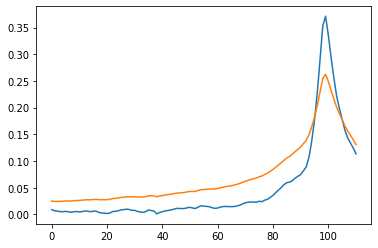

In [38]:
plt.plot(data_c1[0]['sta']['ic']['correg'])


In [10]:
def sta_regularized(data_instance):

    I = data_instance['input_current']-np.mean(data_instance['input_current'])
    spk_ind = data_instance['spikeindices']
    sta = []
    TIME = 50*20
    for i in spk_ind:
        sta.append(I[i-TIME:i])

    X = np.array(sta)
    n_sp = len(X)
    T = len(I)
    lambda_ = 10
    sta_reg  =(1/n_sp)*np.linalg.inv(X.T@X + lambda_*np.diagonal(X.T@X)*np.identity(len(X.T)) )@(X.T@np.ones(len(X)))
    return sta_reg


In [11]:
def return_all_STA_norm(path):
    sta_all  = [] 
    files = os.listdir(path)
    for f in files:
        try:
            data = loadmatInPy(path +f)
            exp = f[:-13]
            exp = return_name_date_exp_fn(exp)
            
            for trial,instance in enumerate(data):
                sta = []
                cond = instance['input_generation_settings']['condition']
                print(exp, trial, cond)
                # sta = list(ephys_obj.get_sta())
                sta_ = sta_regularized(instance)
                sta.append(sta_)
                sta.append(instance['input_generation_settings']['baseline'])
                sta.append(instance['sta']['ic']['normalized_peakdistance'])
                sta.append(cond.lower())
                sta.append(exp)
                sta.append(trial)
                sta_all.append(sta)
        except:
            print('problem with ',f[:-13])
    return sta_all

In [ ]:
all_stas = return_all_STA_norm('D:/Analyzed/')

In [41]:
def return_all_STA(path):
    sta_all  = [] 
    files = os.listdir(path)
    for f in files:
        try:
            data = loadmatInPy(path +f)
            exp = f[:-13]
            exp = return_name_date_exp_fn(exp)
            
            for trial,instance in enumerate(data):
                sta = []
                cond = instance['input_generation_settings']['condition']
                print(exp, trial, cond)
                sta_ = instance['sta']['ic']['correg']
                sta.append(sta_)
                sta.append(instance['input_generation_settings']['baseline'])
                sta.append(instance['sta']['ic']['normalized_peakdistance'])
                sta.append(cond.lower())
                sta.append(exp)
                sta.append(trial)
                sta_all.append(sta)
        except:
            print('problem with ',f[:-13])
    return sta_all

In [42]:
all_stas = return_all_STA('D:/Analyzed/')

asli_18719_E2 0 ACSF
asli_18719_E2 1 M1-ago
asli_18719_E2 2 M1-ant
asli_11719_E1 0 ACSF
asli_11719_E1 1 M1-ago
asli_11719_E1 2 M1-ant
asli_11719_E2 0 ACSF
asli_11719_E2 1 M1-ago
asli_11719_E2 2 M1-ant
asli_12719_E2 0 ACSF
asli_12719_E2 1 M1-ago
asli_12719_E2 2 M1-ant
asli_12719_E3 0 ACSF
asli_12719_E3 1 M1-ago
asli_12719_E3 2 M1-ant
asli_15719_E3 0 ACSF
asli_15719_E3 1 M1-ago
asli_18719_E1 0 ACSF
asli_18719_E1 1 M1-ago
asli_18719_E1 2 M1-ant
asli_2819_E1 0 ACSF
asli_2819_E1 1 M1-ago
asli_2819_E1 2 M1-ago+ant
asli_2819_E2 0 ACSF
asli_2819_E2 1 M1-ago
asli_2819_E2 2 M1-ago+ant
asli_2819_E3 0 ACSF
asli_2819_E3 1 M1-ago
asli_2819_E3 2 M1-ago+ant
asli_23719_E2 0 ACSF
asli_23719_E2 1 M1-ago
asli_23719_E2 2 M1-ant
asli_23719_E3 0 ACSF
asli_23719_E3 1 M1-ago
asli_23719_E3 2 M1-ant
asli_23719_E5 0 ACSF
asli_23719_E5 1 M1-ago
asli_23719_E5 2 M1-ant
asli_24719_E4 0 ACSF
asli_24719_E4 1 M1-ago
asli_24719_E4 2 M1-ant
asli_24719_E5 0 ACSF
asli_24719_E5 1 M1-ago
asli_24719_E5 2 M1-ant
asli_25719_E1 0

In [53]:
len(all_stas[0][0])/20

5.55

In [44]:
df = pd.DataFrame(columns=['sta','baseline','peak_distance','cond','exp_name','trial'])
for i in range(len(all_stas)):
    df.loc[i,'sta'] = np.array(np.hstack(all_stas[i])[:-5],dtype=np.float32)
    df.loc[i,['baseline','peak_distance','cond','exp_name','trial']] = np.hstack(all_stas[i])[-5:] 
df.to_pickle('D:/CurrentClamp/all_stas_fleur.pkl')

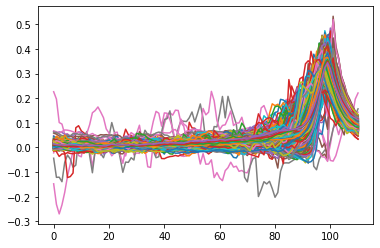

In [48]:
plt.plot(np.arange(),np.vstack(df['sta'].to_numpy()).T)